## Global Food Price

In [30]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
pd.options.display.float_format = "{:,.2f}".format
sns.set(rc={'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings("ignore")

In [31]:
gfp = pd.read_csv('wfpvam_foodprices.csv')

In [32]:
#Setting display
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.width', 1000) 

In [33]:
gfp.head()

,date,country,city,market,product,currency,type,unit,mp_month,mp_year,price,continent
0,2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00,Asia
1,2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,"1,900.00",Africa
2,2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00,Africa
3,2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62,Americas
4,2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64,Americas


In [34]:
print(f"This data comtains {gfp.shape[0]} rows and {gfp.shape[1]} columns")

This data comtains 1871957 rows and 12 columns


In [35]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871957 entries, 0 to 1871956
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   country    object 
 2   city       object 
 3   market     object 
 4   product    object 
 5   currency   object 
 6   type       object 
 7   unit       object 
 8   mp_month   int64  
 9   mp_year    int64  
 10  price      float64
 11  continent  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 171.4+ MB


In [36]:
gfp.head()

,date,country,city,market,product,currency,type,unit,mp_month,mp_year,price,continent
0,2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00,Asia
1,2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,"1,900.00",Africa
2,2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00,Africa
3,2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62,Americas
4,2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64,Americas


In [37]:
gfp.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1871957,257,2020-10-01,35827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1871957,98,Rwanda,136993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1871957,616,North/Amajyaruguru,597057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,1871957,3193,National Average,18173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,1871957,816,Rice (imported) - Retail,51567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,1871957,84,XOF,244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1871957,4,Retail,1705390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit,1871957,121,KG,1447701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp_month,"1,871,957.00",NaN,NaN,NaN,6.39,3.46,1.00,3.00,6.00,9.00,12.00
mp_year,"1,871,957.00",NaN,NaN,NaN,"2,015.97",4.23,"2,000.00","2,013.00","2,017.00","2,020.00","2,021.00"


In [38]:
gfp.shape

(1871957, 12)

In [39]:
#Checking for missing data
gfp.isnull().sum()

date         0
country      0
city         0
market       0
product      0
currency     0
type         0
unit         0
mp_month     0
mp_year      0
price        0
continent    0
dtype: int64

In [40]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871957 entries, 0 to 1871956
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   country    object 
 2   city       object 
 3   market     object 
 4   product    object 
 5   currency   object 
 6   type       object 
 7   unit       object 
 8   mp_month   int64  
 9   mp_year    int64  
 10  price      float64
 11  continent  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 171.4+ MB


## Exploratary Data Analysis

In [41]:
gfp.describe()

,mp_month,mp_year,price
count,"1,871,957.00","1,871,957.00","1,871,957.00"
mean,6.39,"2,015.97","6,615.07"
std,3.46,4.23,"111,656.12"
min,1.00,"2,000.00",0.00
25%,3.00,"2,013.00",42.62
50%,6.00,"2,017.00",236.00
75%,9.00,"2,020.00","1,101.00"
max,12.00,"2,021.00","21,777,780.00"


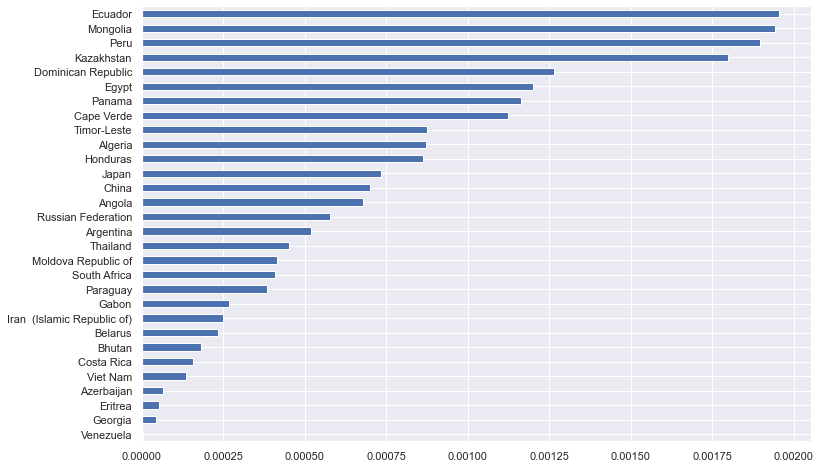

In [42]:
# %percentage count of each country
(gfp['country'].value_counts(normalize=True).sort_values(ascending=True))[:30].plot(kind='barh')

In [43]:
gfp.pivot_table(values=['price'],index=['country','product'],aggfunc=['max', 'min', 'mean', 'count', 'sum'])

max        min         mean count            sum
                                                                      price      price        price price          price
country     product                                                                                                     
Afghanistan Bread - Retail                                            71.00       6.00        38.73  1668      64,604.73
            Exchange rate - Retail                                    80.42      56.48        72.21   968      69,895.86
            Livestock (sheep, one-year-old alive female) - ... 5,833,333.00 168,889.00 1,786,756.29   187 334,123,425.73
            Oil (cooking) - Retail                                   147.50      78.00       107.74   408      43,958.20
            Pulses - Retail                                          138.75      65.60        92.17   408      37,605.53
...                                                                     ...        ...          ...   ...            ...
Zimbabwe    Sugar (white, fortified) - Retail                          3.00       0.75         1.27   103         130.34
            Sugar - Retail                                           150.00      95.71       115.23   295      33,991.66
            Toothpaste - Retail                                      273.33      75.00       110.22   287      31,632.86
            Wheat - Retail                                             1.25       0.40         0.51    64          32.72
            Wheat flour (fortified) - Retail                           4.75       0.90         1.28    79         100.76

[2389 rows x 5 columns]

In [44]:
gfp.groupby('country')['price'].count().sort_values(ascending=False)[:25]


country
Rwanda                              136993
Bassas da India                     125815
Syrian Arab Republic                 93566
Philippines                          77251
Indonesia                            72353
Mali                                 67018
Burundi                              55591
Kyrgyzstan                           55250
Gambia                               51309
Niger                                48475
Nigeria                              47551
Democratic Republic of the Congo     43726
Zambia                               41845
United Republic of Tanzania          41590
Mozambique                           40464
Libya                                39354
Lebanon                              38000
Benin                                34802
Burkina Faso                         33213
Senegal                              33044
Yemen                                28551
Lao People's Democratic Republic     27013
Ukraine                              26761
Taj

In [45]:
gfp.groupby('mp_year')['price'].count()

mp_year
2000      3599
2001      4087
2002      5967
2003      8520
2004      9484
2005     13545
2006     19004
2007     26017
2008     35891
2009     42971
2010     47032
2011     64175
2012     85009
2013    104448
2014    115793
2015    130348
2016    140272
2017    163146
2018    173301
2019    191311
2020    373899
2021    114138
Name: price, dtype: int64

Text(0, 0.5, 'Price')

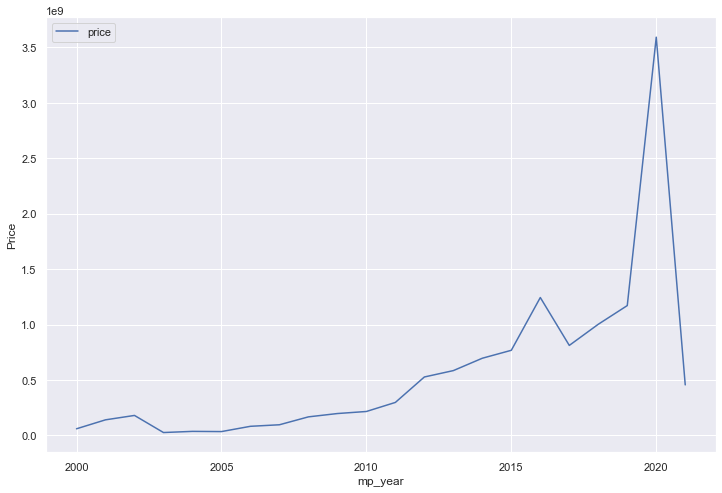

In [46]:
# Plot trend year-on-year
gfp.groupby('mp_year').sum().reset_index().plot(y='price', x='mp_year',  figsize=(12,8))
plt.ylabel('Price')

In [47]:
items= gfp.groupby("product")["price"].count().sort_values(ascending=False)[:25]
items

product
Rice (imported) - Retail         51567
Millet - Retail                  51216
Maize - Retail                   47132
Sorghum - Retail                 45020
Wheat flour - Retail             44434
Sugar - Retail                   43374
Maize (white) - Retail           39777
Rice - Retail                    37632
Rice (local) - Retail            36616
Tomatoes - Retail                29556
Eggs - Retail                    27636
Potatoes - Retail                26800
Onions - Retail                  26125
Oil (palm) - Retail              25564
Meat (beef) - Retail             25292
Groundnuts (shelled) - Retail    24970
Oil (vegetable) - Retail         24766
Salt - Retail                    23091
Wheat - Retail                   20620
Beans (niebe) - Retail           18020
Beans (dry) - Retail             17232
Cabbage - Retail                 15867
Carrots - Retail                 15499
Sweet potatoes - Retail          14968
Lentils - Retail                 14525
Name: price, dtyp

Text(0.5, 1.0, 'Top 25 items purchase around globe')

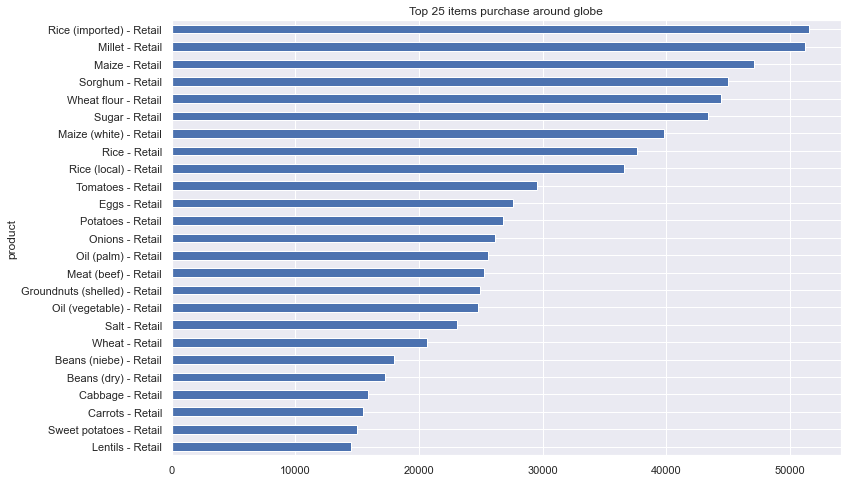

In [48]:
items.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.title("Top 25 items purchase around globe")

In [49]:
top_countries=gfp.groupby("country")["price"].count().sort_values(ascending=False)[:12]
top_countries

country
Rwanda                              136993
Bassas da India                     125815
Syrian Arab Republic                 93566
Philippines                          77251
Indonesia                            72353
Mali                                 67018
Burundi                              55591
Kyrgyzstan                           55250
Gambia                               51309
Niger                                48475
Nigeria                              47551
Democratic Republic of the Congo     43726
Name: price, dtype: int64

Text(0.5, 0, 'Frequency of Purchase')

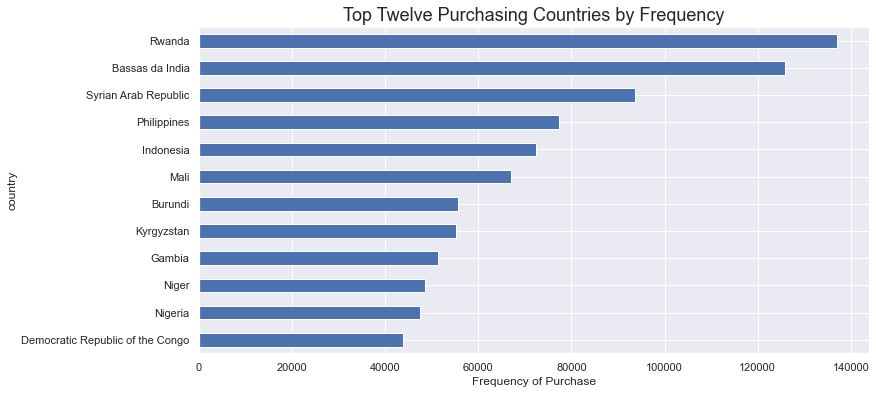

In [50]:
top_countries.sort_values(ascending= True).plot(kind='barh', figsize=(12, 6))
plt.title('Top Twelve Purchasing Countries by Frequency',fontsize=18)
plt.xlabel('Frequency of Purchase')

In [51]:
continents =gfp.groupby("continent")["price"].count().sort_values(ascending=False)
continents

continent
Africa      1016581
Asia         734183
Americas      92054
Europe        29139
Name: price, dtype: int64

Text(0.5, 0, 'Frequency of Purchase')

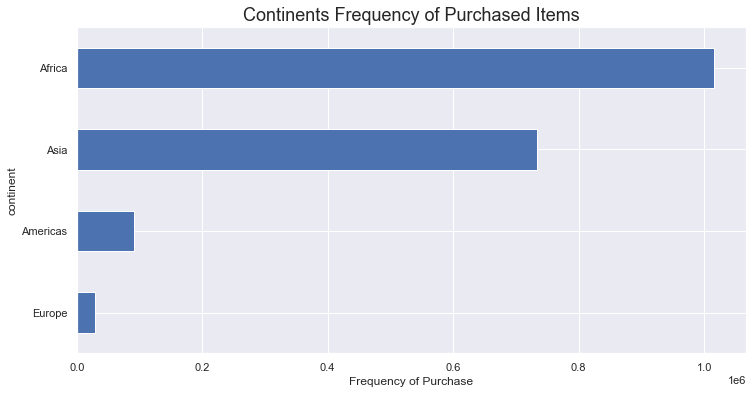

In [52]:
continents.sort_values(ascending= True).plot(kind='barh', figsize=(12, 6))
plt.title('Continents Frequency of Purchased Items',fontsize=18)
plt.xlabel('Frequency of Purchase')

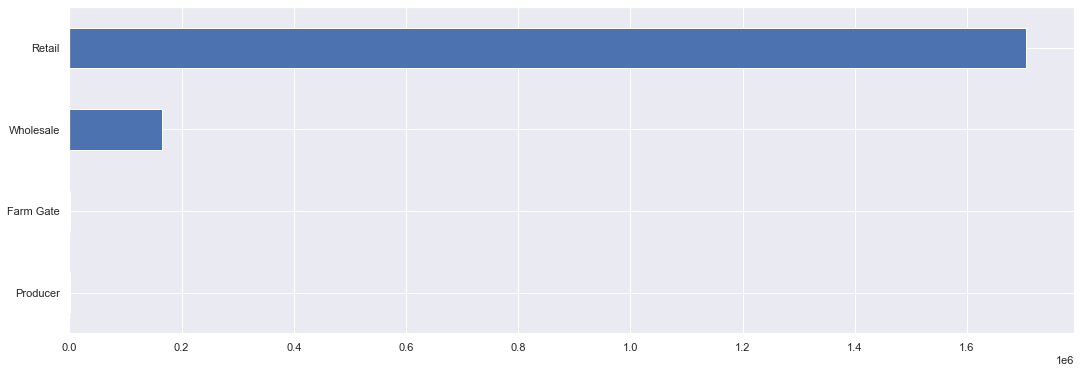

In [57]:
gfp['type'].value_counts(ascending= True).plot(kind='barh', figsize=(18, 6))

In [55]:
gfp['unit'].value_counts(ascending= True)

Day                  2
2.5 KG               8
120 KG              13
800 G               16
Heap                26
Pile                34
15 KG               36
360 pcs             52
100 pcs             59
50 pcs              59
168 G               65
380 G               68
100 L               79
115 G               84
85 G               108
160 KG             149
16 KG              155
385 G              158
73 KG              185
27 KG              186
kWh                192
68 KG              206
Package            216
20 L               219
LCU/3.5kg          233
1.6 KG             240
4 pcs              252
150 ml             252
Bundle             310
500 ML             349
84 KG              355
50 Pounds          396
52 KG              398
60 KG              416
350 G              420
2.25 KG            435
3.4 KG             468
0.8 KG             504
18 KG              506
3.1 KG             515
Cuartilla          556
170 G              588
28 pcs             591
1 GB       

In [58]:
gfp.pivot_table(values=['price'],index=['country','currency'],aggfunc=['max', 'min', 'mean', 'count', 'sum'])

,,max,min,mean,count,sum
,,price,price,price,price,price
country,currency,,,,,
Afghanistan,AFN,"5,833,333.00",2.77,"31,799.60",10521,"334,563,553.33"
Algeria,DZD,"1,200.00",4.00,177.81,1633,"290,361.70"
Angola,AOA,"14,280.95",35.20,"1,038.96",1272,"1,321,561.50"
Argentina,ARS,355.55,0.17,24.30,972,"23,616.72"
Armenia,AMD,"4,000.00",38.20,853.26,18263,"15,583,075.86"
Azerbaijan,AZN,1.00,0.24,0.53,125,65.98
Bangladesh,BDT,"4,925.00",14.00,338.98,7166,"2,429,157.14"
Bassas da India,INR,"4,910.00",2.50,95.02,125815,"11,954,992.85"
